In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Q1>> Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

In [3]:
df = sns.load_dataset('diamonds')

In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
# preprocessing >> droping all the nan values

df.select_dtypes(include=np.number).dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [6]:
df

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,False,...,False,False,False,False,False,False,False,True,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,False,True,...,False,False,False,False,False,False,False,True,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,True,False,...,False,False,False,False,False,False,False,True,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,True,False,False,...,True,False,False,False,False,False,False,False,True,False


In [7]:
df.dtypes

carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Premium         bool
cut_Very Good       bool
cut_Good            bool
cut_Fair            bool
color_E             bool
color_F             bool
color_G             bool
color_H             bool
color_I             bool
color_J             bool
clarity_VVS1        bool
clarity_VVS2        bool
clarity_VS1         bool
clarity_VS2         bool
clarity_SI1         bool
clarity_SI2         bool
clarity_I1          bool
dtype: object

In [8]:
# Feature and Target
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
X

,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,3.89,3.84,2.31,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
53936,0.72,63.1,55.0,5.69,5.75,3.61,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
53937,0.70,62.8,60.0,5.66,5.68,3.56,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
53938,0.86,61.0,58.0,6.15,6.12,3.74,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [10]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [11]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
X_train

,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
42836,0.41,62.3,53.0,4.80,4.77,2.98,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9727,1.12,60.5,59.0,6.79,6.73,4.09,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35974,0.42,60.6,56.0,4.83,4.87,2.94,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
22501,1.04,62.5,59.0,6.46,6.41,4.02,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3571,0.70,58.4,60.0,5.84,5.87,3.42,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0.70,62.8,59.0,5.56,5.61,3.51,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
32511,0.40,63.9,57.0,4.71,4.65,2.99,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
5192,0.91,62.7,63.0,6.05,6.00,3.78,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
12172,1.18,61.7,56.0,6.79,6.82,4.20,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [13]:
y_train

42836     1356
9727      4654
35974      921
22501    10539
3571      3419
         ...  
50057     2202
32511      798
5192      3776
12172     5182
33003      813
Name: price, Length: 43152, dtype: int64

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 23), (10788, 23), (43152,), (10788,))

In [15]:
# MLR model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model

LinearRegression()

In [17]:
# Fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# Prediction
y_pred = model.predict(X_test)

In [19]:
# residials
residials = y_test-y_pred

In [20]:
residials

2714     1112.741158
14653    -965.288253
52760    -959.291465
48658     719.769670
14812    -640.361464
            ...     
49568    -755.452326
32163    -761.228219
52459    -203.805328
15265    -459.897748
43028     152.275798
Name: price, Length: 10788, dtype: float64

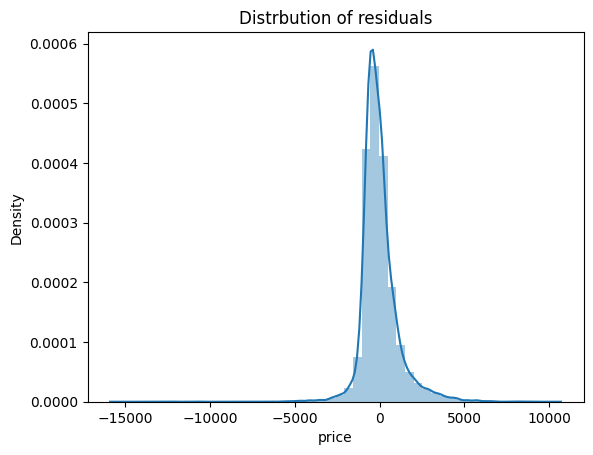

In [21]:
# Visualize the residuals
sns.distplot(residials)
plt.title('Distrbution of residuals')
plt.show()


Q2>>Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [23]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  1215436.8460332737
Mean Absolute Error:  733.1763022118192
Root Mean Squared Error:  1102.4685238288093


Q3>> Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

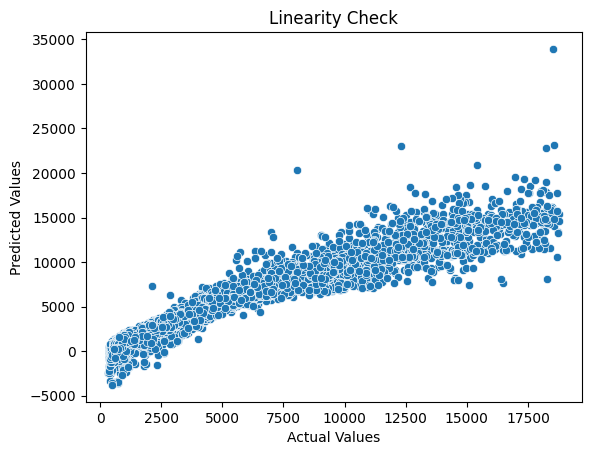

In [24]:
# check linearity

sns.scatterplot(x=y_test, y=y_pred)
# sns.lineplot(x=y_test, y=y_pred, color='r')
plt.title('Linearity Check')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

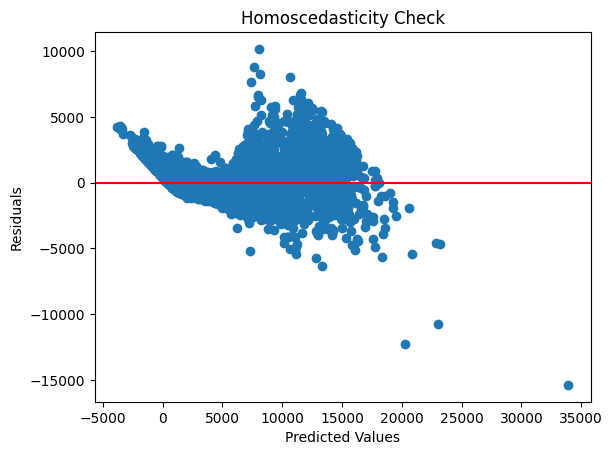

In [25]:
# residuals plot for homoscedasticity
plt.scatter(y_pred, residials)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Homoscedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

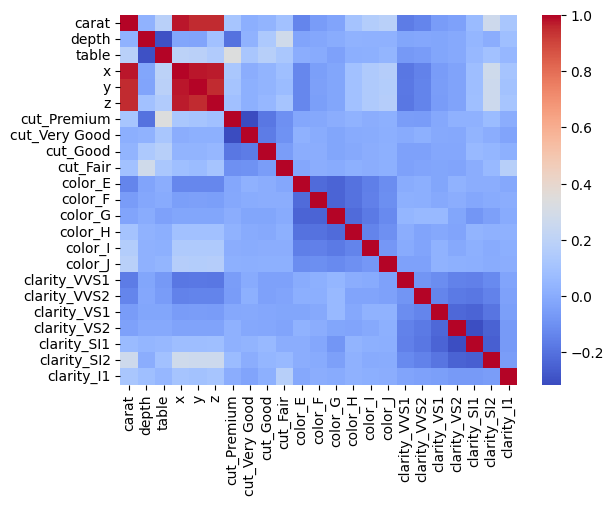

In [26]:
# correlation matrix for multicollinearity

corr = X.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

Qn4>>Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models

In [27]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


In [28]:
# Pipeline with feature scaling and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Evaluate pipeline
print(f"R^2 Score: {pipeline.score(X_test, y_test)}")

R^2 Score: 0.92177561343152


Qn5>>Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

In [29]:
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1'],
      dtype='object')

In [30]:
# Using only one feature for simplicity
X_simple = df[['carat']]
y = df[['price']]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=1)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
model.coef_

array([[7753.27110974]])

In [36]:
model.intercept_


array([-2248.17307321])

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,y_pred)

0.8482566296393822

Qn6>> Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

In [39]:
df = sns.load_dataset('tips')

In [40]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [41]:
X = df[['total_bill']]
y = df[['tip']]

In [42]:
X

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [43]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model


LinearRegression()

In [46]:
model.fit(X_train, y_train)


LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_pred

array([[1.29124525],
       [2.87227083],
       [3.65825491],
       [2.41738632],
       [3.11178967],
       [1.76122548],
       [2.11345906],
       [3.08562375],
       [2.43952672],
       [3.45697858],
       [2.20604617],
       [1.99772517],
       [3.99438638],
       [3.51937424],
       [6.09571129],
       [3.2637533 ],
       [3.33017449],
       [2.0178528 ],
       [2.2593844 ],
       [3.71763143],
       [4.0155204 ],
       [2.77163267],
       [2.62470094],
       [3.31407238],
       [2.23321848],
       [2.05408254],
       [3.0443621 ],
       [3.52641891],
       [2.8632134 ],
       [4.00746935],
       [2.29058223],
       [4.04168632],
       [2.09131867],
       [4.58815156],
       [4.4875134 ],
       [2.33285026],
       [4.12924153],
       [2.82899642],
       [2.69011575],
       [2.10641439],
       [3.40565311],
       [3.0604642 ],
       [3.24563843],
       [2.49286495],
       [3.06448973],
       [3.89777374],
       [3.40364035],
       [4.530

In [49]:
X_test.shape, y_test.shape

((74, 1), (74, 1))

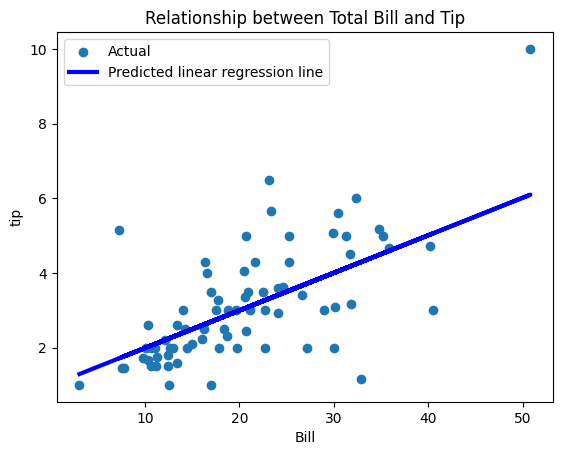

In [50]:
plt.scatter(x=X_test, y=y_test, label = 'Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3 ,label='Predicted linear regression line')
plt.title('Relationship between Total Bill and Tip')
plt.xlabel('Bill')
plt.ylabel('tip')
plt.legend()
plt.show()

Qn7>> Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

In [51]:
# Step 1: Create a synthetic dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=1)

In [52]:
# Step 2: Fit a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [53]:
model.fit(X,y)

LinearRegression()

In [54]:
# Step 3: Predict values using the trained model
import numpy as np
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_new)

In [55]:
y_pred

array([-185.77281113, -182.0744542 , -178.37609728, -174.67774036,
       -170.97938344, -167.28102651, -163.58266959, -159.88431267,
       -156.18595575, -152.48759882, -148.7892419 , -145.09088498,
       -141.39252805, -137.69417113, -133.99581421, -130.29745729,
       -126.59910036, -122.90074344, -119.20238652, -115.50402959,
       -111.80567267, -108.10731575, -104.40895883, -100.7106019 ,
        -97.01224498,  -93.31388806,  -89.61553114,  -85.91717421,
        -82.21881729,  -78.52046037,  -74.82210344,  -71.12374652,
        -67.4253896 ,  -63.72703268,  -60.02867575,  -56.33031883,
        -52.63196191,  -48.93360498,  -45.23524806,  -41.53689114,
        -37.83853422,  -34.14017729,  -30.44182037,  -26.74346345,
        -23.04510653,  -19.3467496 ,  -15.64839268,  -11.95003576,
         -8.25167883,   -4.55332191,   -0.85496499,    2.84339193,
          6.54174886,   10.24010578,   13.9384627 ,   17.63681963,
         21.33517655,   25.03353347,   28.73189039,   32.43024

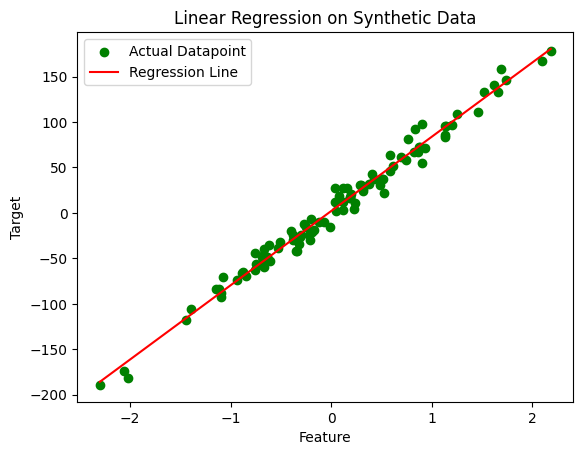

In [56]:
# Step 4: Plot the data points and the regression line
import matplotlib.pyplot as plt
plt.scatter(X,y, color='green', label='Actual Datapoint')
plt.plot(X_new, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

Qn8>>Write a Python script that pickles a trained linear regression model and saves it to a file.

In [57]:
import pickle

In [58]:
model

LinearRegression()

In [59]:
pickle.dump(model, open("model.pkl", "wb"))

In [60]:
model = pickle.load(open("model.pkl", "rb"))

In [61]:
model

LinearRegression()

In [62]:
model.predict(X_new)

array([-185.77281113, -182.0744542 , -178.37609728, -174.67774036,
       -170.97938344, -167.28102651, -163.58266959, -159.88431267,
       -156.18595575, -152.48759882, -148.7892419 , -145.09088498,
       -141.39252805, -137.69417113, -133.99581421, -130.29745729,
       -126.59910036, -122.90074344, -119.20238652, -115.50402959,
       -111.80567267, -108.10731575, -104.40895883, -100.7106019 ,
        -97.01224498,  -93.31388806,  -89.61553114,  -85.91717421,
        -82.21881729,  -78.52046037,  -74.82210344,  -71.12374652,
        -67.4253896 ,  -63.72703268,  -60.02867575,  -56.33031883,
        -52.63196191,  -48.93360498,  -45.23524806,  -41.53689114,
        -37.83853422,  -34.14017729,  -30.44182037,  -26.74346345,
        -23.04510653,  -19.3467496 ,  -15.64839268,  -11.95003576,
         -8.25167883,   -4.55332191,   -0.85496499,    2.84339193,
          6.54174886,   10.24010578,   13.9384627 ,   17.63681963,
         21.33517655,   25.03353347,   28.73189039,   32.43024

Qn9>> Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

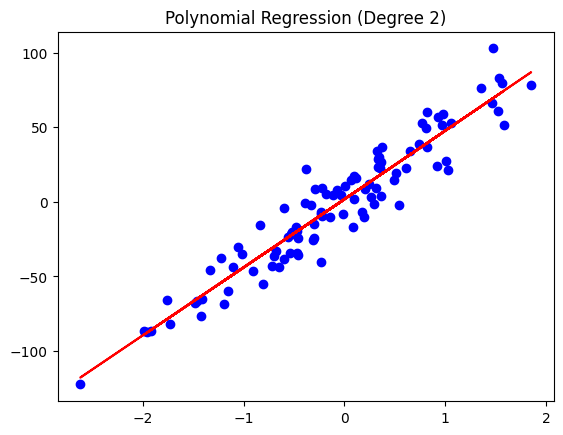

In [63]:
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
X_poly, y_poly = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Transform features to polynomial
poly = PolynomialFeatures(degree=2)
X_poly_transformed = poly.fit_transform(X_poly)

# Fit polynomial regression
poly_model = LinearRegression()
poly_model.fit(X_poly_transformed, y_poly)

# Predict  
y_pred_poly = poly_model.predict(X_poly_transformed)

# plotting
plt.scatter(X_poly, y_poly, color='blue')
plt.plot(X_poly, y_pred_poly, color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.show()


Q10>>Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept

In [64]:
import numpy as np
np.random.seed(42)

In [65]:
X = np.random.rand(100,1)*10
y = 3 * X + np.random.randn(100, 1)

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [67]:
model.fit(X,y)

LinearRegression()

In [68]:
model.coef_

array([[2.95402268]])

In [69]:
model.intercept_

array([0.21509616])

Q11>> Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

In [70]:
import numpy as np
# gen synthetic dataset
np.random.seed(10)
X = np.random.rand(100,1)*10
y = 2*X + np.random.randn(100,1)*2

In [71]:
X

array([[7.71320643],
       [0.20751949],
       [6.33648235],
       [7.48803883],
       [4.98507012],
       [2.24796646],
       [1.98062865],
       [7.60530712],
       [1.69110837],
       [0.88339814],
       [6.85359818],
       [9.53393346],
       [0.03948266],
       [5.12192263],
       [8.12620962],
       [6.12526067],
       [7.21755317],
       [2.91876068],
       [9.17774123],
       [7.14575783],
       [5.42544368],
       [1.42170048],
       [3.7334076 ],
       [6.74133615],
       [4.41833174],
       [4.34013993],
       [6.17766978],
       [5.13138243],
       [6.50397182],
       [6.01038953],
       [8.05223197],
       [5.21647152],
       [9.08648881],
       [3.19236089],
       [0.90459349],
       [3.00700057],
       [1.13984362],
       [8.28681326],
       [0.46896319],
       [6.26287148],
       [5.47586156],
       [8.19286996],
       [1.9894754 ],
       [8.56850302],
       [3.51652639],
       [7.54647692],
       [2.95961707],
       [8.839

In [72]:
y

array([[ 1.76418293e+01],
       [ 9.04126940e-01],
       [ 1.25491406e+01],
       [ 1.34682917e+01],
       [ 1.13940583e+01],
       [ 6.33247121e+00],
       [ 2.99707102e+00],
       [ 1.53897895e+01],
       [ 5.03621398e+00],
       [-2.14222796e+00],
       [ 1.39421477e+01],
       [ 1.52529531e+01],
       [-1.76685320e+00],
       [ 1.11833481e+01],
       [ 1.59636857e+01],
       [ 1.14502446e+01],
       [ 1.38431386e+01],
       [ 7.53393858e+00],
       [ 1.97691434e+01],
       [ 1.27169778e+01],
       [ 1.14367688e+01],
       [ 1.90178645e+00],
       [ 1.22754664e+01],
       [ 1.20039588e+01],
       [ 8.21100597e+00],
       [ 7.98251603e+00],
       [ 1.14772871e+01],
       [ 1.05449732e+01],
       [ 1.35540423e+01],
       [ 8.78363757e+00],
       [ 1.49582372e+01],
       [ 7.79204796e+00],
       [ 2.06453883e+01],
       [ 1.13153719e+01],
       [ 4.57565144e+00],
       [ 6.70646736e+00],
       [ 4.32471945e+00],
       [ 1.69072471e+01],
       [ 4.2

In [73]:
# Fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

In [74]:
model

LinearRegression()

In [75]:
y_pred

array([[15.36231516],
       [ 0.89915342],
       [12.70942233],
       [14.92842609],
       [10.10530444],
       [ 4.83101398],
       [ 4.3158646 ],
       [15.15439746],
       [ 3.75797048],
       [ 2.20154484],
       [13.70588408],
       [18.8707841 ],
       [ 0.5753531 ],
       [10.36901382],
       [16.15815596],
       [12.30240651],
       [14.40721095],
       [ 6.12360791],
       [18.18441576],
       [14.26886417],
       [10.95388686],
       [ 3.23883213],
       [ 7.69340029],
       [13.48955959],
       [ 9.01322201],
       [ 8.86254949],
       [12.4033968 ],
       [10.38724246],
       [13.03216791],
       [12.08105438],
       [16.01560396],
       [10.55120579],
       [18.00857596],
       [ 6.65082469],
       [ 2.24238744],
       [ 6.29364268],
       [ 2.69570512],
       [16.46763283],
       [ 1.40294509],
       [12.5675771 ],
       [11.05104012],
       [16.28660779],
       [ 4.33291194],
       [17.01043785],
       [ 7.27547879],
       [15

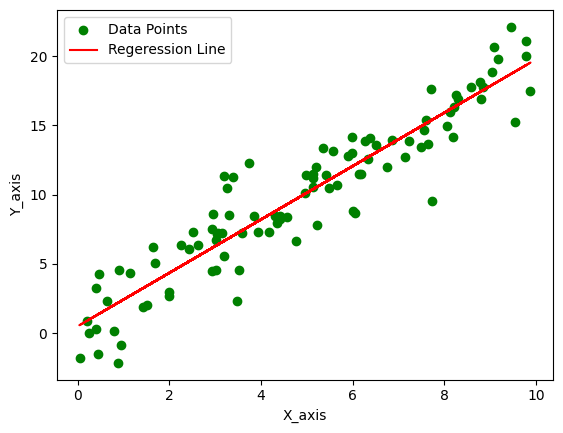

In [76]:
# Visualize the regeression line and data pts
plt.scatter(X,y, color='g', label='Data Points')
plt.plot(X,y_pred, color='r', label='Regeression Line')
plt.xlabel('X_axis')
plt.ylabel('Y_axis')
plt.legend()
plt.show()

Q12>> Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [77]:
from sklearn.datasets import load_diabetes

In [78]:
diabetes = load_diabetes()

In [79]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [80]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [81]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [82]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [83]:
data['target'] = diabetes.target

In [84]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [85]:
X = data[['bmi']] #independent variable
y = data['target'] #dependent variable

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [88]:
model.coef_

array([977.74040067])

In [89]:
model.intercept_

151.66780594915235

In [90]:
y_pred = model.predict(X_test)

In [91]:
y_pred

array([120.30830405, 111.87774078, 242.55147149,  87.63987137,
       157.19201836, 170.89168368, 226.74416536, 136.11561019,
       129.79268773, 116.09302241, 189.86045104, 131.90032855,
       121.36212446, 152.97673673, 194.07573268, 215.15214086,
       148.76145509, 119.25448364, 127.68504691, 162.46112041,
       155.08437755, 100.28571628, 141.38471223, 111.87774078,
        90.8013326 , 196.1833735 , 129.79268773, 190.91427145,
       113.9853816 , 163.51494082, 145.59999387, 150.86909591,
       205.66775718, 119.25448364,  95.01661424, 167.73022245,
        80.26312851, 210.93685922, 190.91427145, 127.68504691,
       161.4073    , 145.59999387, 121.36212446, 138.223251  ,
       132.95414896, 102.3933571 , 179.32224695, 113.9853816 ,
       209.88303881, 131.90032855, 144.54617346, 200.39865513,
       107.66245914, 105.55481833, 174.05314491, 137.16943059,
       158.24583877, 121.36212446,  83.42458974, 126.6312265 ,
       122.41594487, 227.79798576, 161.4073    , 131.90

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2512945795962107

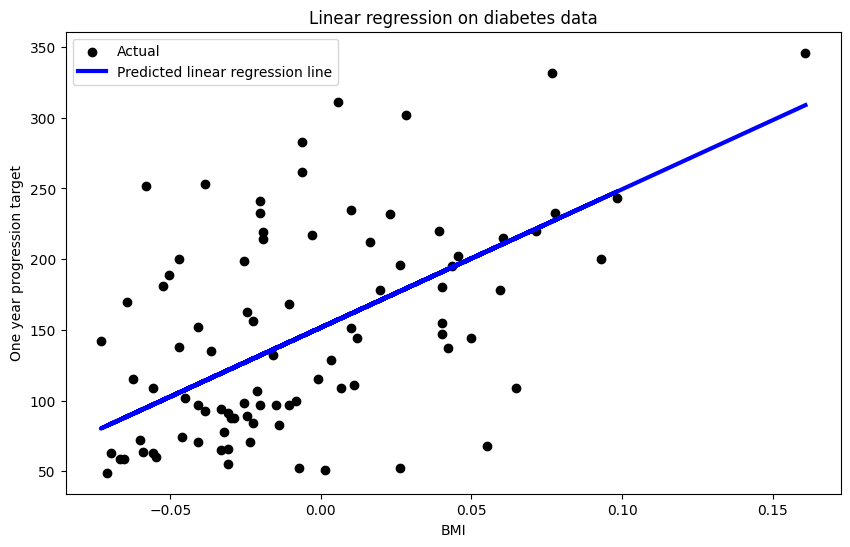

In [93]:
#visualise the result
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3 ,label='Predicted linear regression line')
plt.xlabel("BMI")
plt.ylabel("One year progression target")
plt.title("Linear regression on diabetes data")
plt.legend()
plt.show()

Qn13>> Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

In [94]:
import numpy as np
np.random.seed(20)
X = np.random.rand(100,1)*10
y = 2*X + np.random.randn(100,1)*1

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)

In [98]:
y_pred

array([[ 0.45651538],
       [ 6.43486849],
       [ 0.859863  ],
       [14.07890402],
       [ 1.99872006],
       [15.25271349],
       [ 6.37077973],
       [ 5.7408515 ],
       [ 1.21421366],
       [ 9.11071191],
       [ 0.19093879],
       [ 5.9773739 ],
       [13.42631387],
       [15.82945787],
       [ 8.04241527],
       [ 5.09951538],
       [13.13794828],
       [ 4.87181063],
       [ 5.08889671],
       [ 5.17361309]])

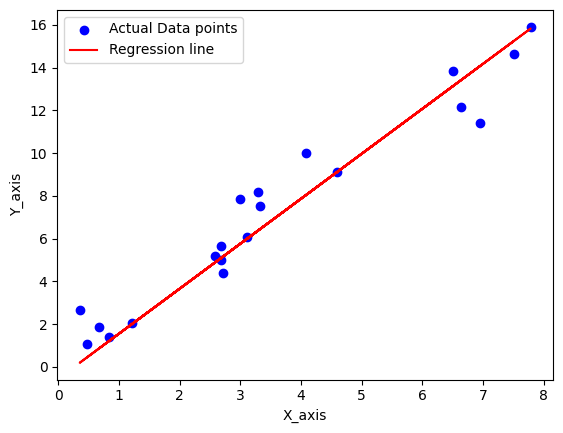

In [99]:
# Visialization
plt.scatter(X_test,y_test, color='blue', label='Actual Data points')
plt.plot(X_test,y_pred, color='red', label='Regression line')
plt.xlabel('X_axis')
plt.ylabel('Y_axis')
plt.legend()
plt.show()

Q14>>Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [101]:
from sklearn.datasets import fetch_california_housing

In [102]:
data = fetch_california_housing()

In [103]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [104]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [105]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [106]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [107]:
df['Price'] = data.target

In [108]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [109]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


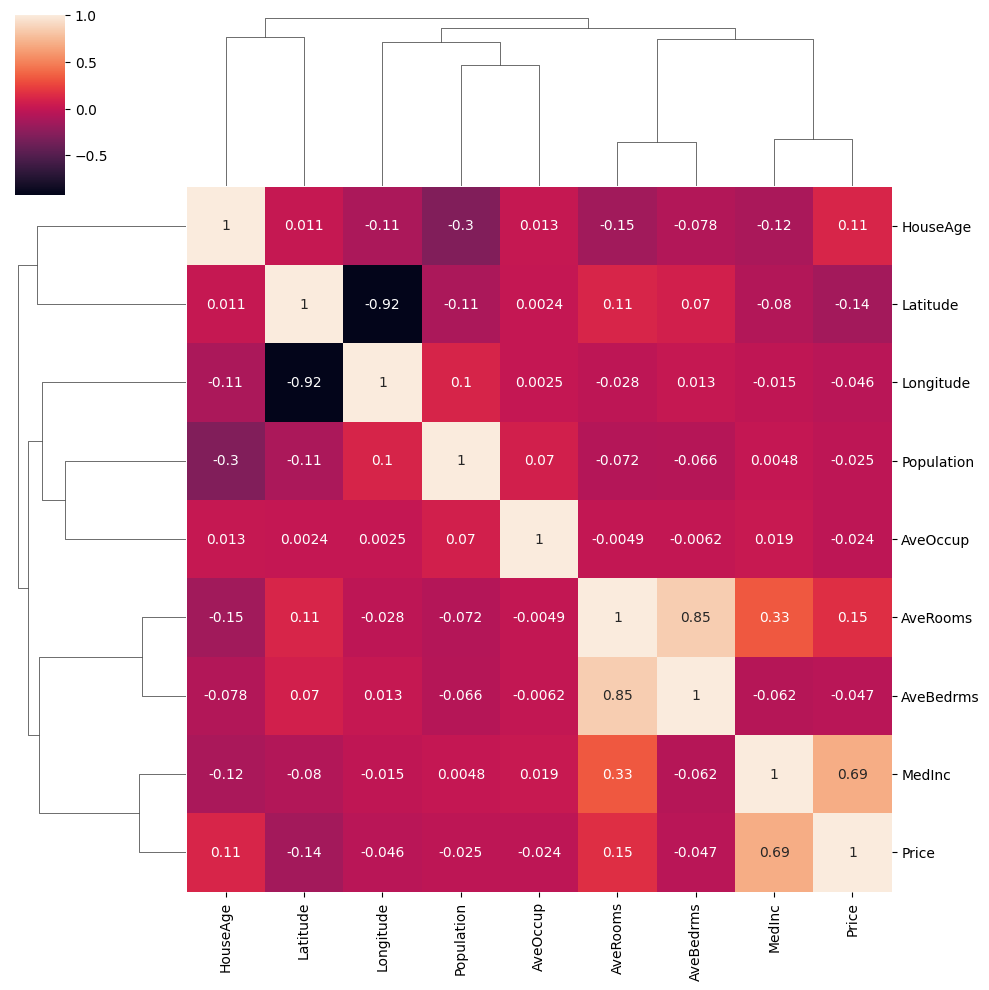

In [110]:
sns.clustermap(df.corr(), annot=True)

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
vif = pd.DataFrame()
vif['Feature'] = df.columns

In [113]:
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [114]:
vif

,Feature,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [115]:
df1 = df.copy()

In [116]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [117]:
df1.drop('Longitude', inplace=True,axis=1)

In [118]:
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [119]:
vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [120]:
df1.drop('AveRooms', axis=1, inplace=True)

In [ ]:
df1

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Price
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,39.43,0.847


In [122]:
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [123]:
vif

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [124]:
df1.drop('Latitude', axis=1, inplace=True)

In [125]:
df1

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [126]:
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [127]:
vif

,Feature,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,Price,8.607339


Qn15>> Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve

In [128]:
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 5 + 2 * X + 0.5 * X**2 + 0.1 * X**3 + 0.01 * X**4 + np.random.randn(100, 1) * 50



In [129]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [131]:
X_range = np.linspace(min(X), max(X), 500).reshape(-1, 1)
y_pred = model.predict(poly.transform(X_range))

len(y_pred)

500

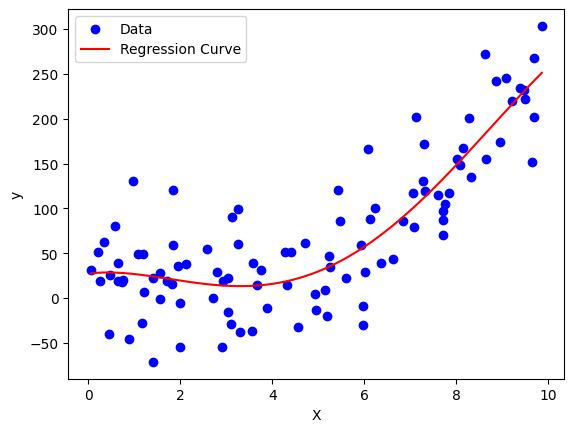

In [132]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_range, y_pred, color='red', label='Regression Curve')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Qn16>> Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [133]:
# gen. synthetic dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=5, noise=0.1, random_state=20)

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [135]:
# create pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pipeline = Pipeline([
    ('Scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [136]:
pipeline

Pipeline(steps=[('Scaler', StandardScaler()), ('model', LinearRegression())])

In [137]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('model', LinearRegression())])

In [138]:
y_pred = pipeline.predict(X_test)

In [139]:
score = pipeline.score(X_test,y_test)

In [140]:
score

0.9999985030321817

In [141]:
pipeline.score(X_test,y_pred)

1.0

Qn17>> Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.




In [142]:
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 5 + 2 * X + 0.5 * X**2 + 0.1 * X**3 + 0.01 * X**4 + np.random.randn(100, 1) * 50

In [143]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model.fit(X_poly, y)

LinearRegression()

In [144]:
y_pred = model.predict(poly.transform(X_range))

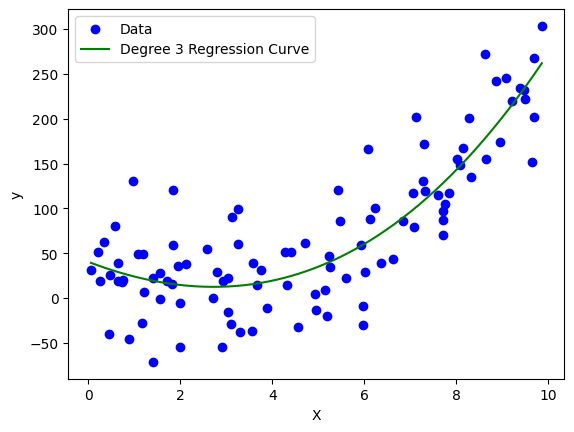

In [145]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_range, y_pred, color='green', label='Degree 3 Regression Curve')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Qn18>>Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.

In [146]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=5, noise=0.2, random_state=20)


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [148]:
len(X_test),len(y_test)

(20, 20)

In [149]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [150]:
y_pred = model.predict(X_test)


In [151]:
model.coef_


array([11.66221069, 41.51173046, 66.81483159, 76.27894804, 14.65854685])

In [152]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9999977838180385

Qn19>> Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line


In [153]:
# Generate data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [154]:
# Fit linear regression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [155]:
y_pred = model.predict(X)

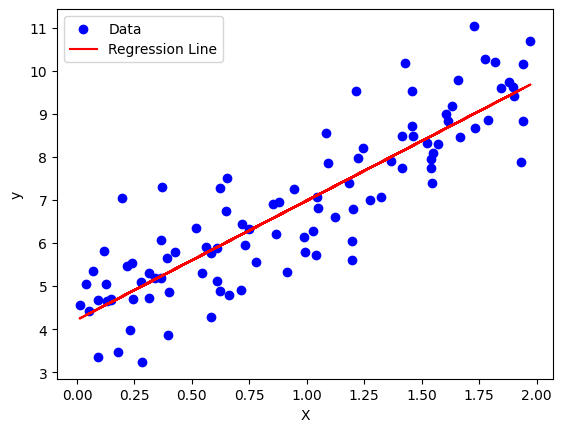

In [156]:
# Plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X,y_pred , color='red', label='Regression Line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Qn20>> Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [157]:
from sklearn.datasets import  make_regression
X, y = make_regression(n_samples=1000, n_features=3, noise=0.1, random_state=10)

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)


In [159]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [160]:
model.coef_

array([27.15781785, 88.10075023, 53.16454628])

In [161]:
y_pred = model.predict(X_test)

In [162]:
r2_score(y_test,y_pred)

0.9999990641407043

Qn21>> . Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [163]:
import joblib


In [164]:
# Save the model
joblib.dump(model, 'linear_model.pkl')

['linear_model.pkl']

In [165]:
# Load the model
loaded_model = joblib.load('linear_model.pkl')


In [166]:
# Test
print(f"Loaded model R-squared score: {loaded_model.score(X, y)}")

Loaded model R-squared score: 0.9999990135513556


Qn22>> Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [167]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [168]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [170]:
X = df.drop('tip', axis=1)
y = df['tip']

In [171]:
categorical_features = ['sex', 'smoker', 'day', 'time']
numerical_features = ['total_bill', 'size']

In [175]:
# Apply one-hot encoding to categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

In [183]:
X_encoded = encoder.fit_transform(X[categorical_features])

In [184]:
encoder.get_feature_names_out(categorical_features)

array(['sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Lunch'], dtype=object)

In [185]:
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

In [186]:
X_encoded

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
239,1.0,0.0,1.0,0.0,0.0,0.0
240,0.0,1.0,1.0,0.0,0.0,0.0
241,1.0,1.0,1.0,0.0,0.0,0.0
242,1.0,0.0,1.0,0.0,0.0,0.0


In [187]:
X_final = pd.concat([X_encoded, X[numerical_features].reset_index(drop=True)], axis=1)

In [188]:
X_final

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill,size
0,0.0,0.0,0.0,1.0,0.0,0.0,16.99,2
1,1.0,0.0,0.0,1.0,0.0,0.0,10.34,3
2,1.0,0.0,0.0,1.0,0.0,0.0,21.01,3
3,1.0,0.0,0.0,1.0,0.0,0.0,23.68,2
4,0.0,0.0,0.0,1.0,0.0,0.0,24.59,4
...,...,...,...,...,...,...,...,...
239,1.0,0.0,1.0,0.0,0.0,0.0,29.03,3
240,0.0,1.0,1.0,0.0,0.0,0.0,27.18,2
241,1.0,1.0,1.0,0.0,0.0,0.0,22.67,2
242,1.0,0.0,1.0,0.0,0.0,0.0,17.82,2


In [189]:
X = X_final

In [190]:
X

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill,size
0,0.0,0.0,0.0,1.0,0.0,0.0,16.99,2
1,1.0,0.0,0.0,1.0,0.0,0.0,10.34,3
2,1.0,0.0,0.0,1.0,0.0,0.0,21.01,3
3,1.0,0.0,0.0,1.0,0.0,0.0,23.68,2
4,0.0,0.0,0.0,1.0,0.0,0.0,24.59,4
...,...,...,...,...,...,...,...,...
239,1.0,0.0,1.0,0.0,0.0,0.0,29.03,3
240,0.0,1.0,1.0,0.0,0.0,0.0,27.18,2
241,1.0,1.0,1.0,0.0,0.0,0.0,22.67,2
242,1.0,0.0,1.0,0.0,0.0,0.0,17.82,2


In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [193]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [197]:
model.coef_

array([ 0.02881928, -0.19235325, -0.1857853 , -0.05079339, -0.17972098,
        0.09495716,  0.09469974,  0.23348393])

In [198]:
model.intercept_

0.7274156956059143

In [194]:
y_pred = model.predict(X_test)

In [195]:
y_pred

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [196]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.70335660174361
R-squared: 0.4373018194348254


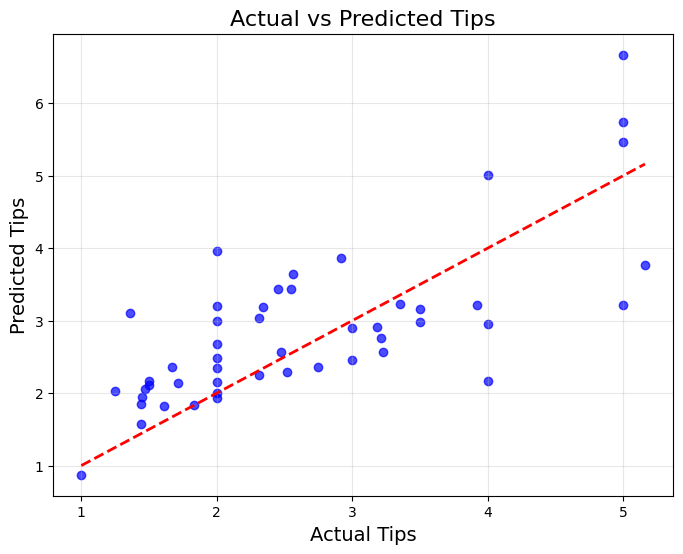

In [206]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Line of perfect prediction
plt.title('Actual vs Predicted Tips', fontsize=16)
plt.xlabel('Actual Tips', fontsize=14)
plt.ylabel('Predicted Tips', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


Qn23>> Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [207]:
from sklearn.linear_model import Ridge


In [208]:
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)


In [209]:
linear_model = LinearRegression()
linear_model.fit(X, y)


LinearRegression()

In [210]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

Ridge()

In [211]:
# Compare
print("Linear Regression:")
print(f"R-squared: {linear_model.score(X, y)}")
print(f"Coefficients: {linear_model.coef_}")

print("\nRidge Regression:")
print(f"R-squared: {ridge_model.score(X, y)}")
print(f"Coefficients: {ridge_model.coef_}")

Linear Regression:
R-squared: 0.9999995564125111
Coefficients: [60.59000738 98.65432927 64.55891226 57.05696343 35.60947647]

Ridge Regression:
R-squared: 0.9998666852290666
Coefficients: [60.00694188 97.51793602 63.45136759 56.40717681 35.40203643]


Qn24>>Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [212]:
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)


In [213]:
model = LinearRegression()


In [215]:
# Perform cross-validation
# Using 5-fold cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

In [216]:
# Print the cross-validation results
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean R-squared score:", np.mean(cv_scores))
print("Standard deviation of R-squared scores:", np.std(cv_scores))

Cross-Validation R-squared scores: [0.99999931 0.99999901 0.99999977 0.99999917 0.99999934]
Mean R-squared score: 0.9999993197756156
Standard deviation of R-squared scores: 2.542218324267291e-07


Q25>>. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [217]:
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [219]:
linear_model = LinearRegression()


In [220]:
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

In [224]:
linear_model.fit(X_train_poly, y_train)


LinearRegression()

In [225]:
y_pred = linear_model.predict(X_test_poly)


In [227]:
r2 = r2_score(y_test, y_pred)
print(f"Degree {degree}: R-squared score = {r2:.4f}")

Degree 5: R-squared score = 0.8740
